In [74]:
import pandas as pd 
import numpy as np

In [75]:
file_path = "interface/project_data/2019-29/labor-force.xlsx"
data = pd.read_excel(file_path, sheet_name=None)

#sheet_name = None reads all the sheets into a dictionary where sheet names are keys and the valeu is the dataframe

In [76]:
for sheet_name, df in data.items():
    print(f"Sheet: {sheet_name}")
    print(df.head(), "\n")

Sheet: Index
                                 Labor.xlsx Contents
0  Table 3.1. Civilian labor force by age, sex, r...
1  Table 3.2. Civilian noninstitutional populatio...
2  Table 3.3. Civilian labor force participation ...
3  Table 3.4. Median age of the labor force, by s...
4  Table 3.5. Economic dependency ratio, 1999, 20... 

Sheet: Table 3.1
  Table 3.1. Civilian labor force by age, sex, race, and ethnicity, 1999, 2009, 2019, and projected 2029 (Numbers in thousands)  \
0                                              Group                                                                              
1                                                NaN                                                                              
2                          Total, 16 years and older                                                                              
3                                           16 to 24                                                                          

In [77]:
#procssing table 3.1

df1 = data["Table 3.1"]
df1


,"Table 3.1. Civilian labor force by age, sex, race, and ethnicity, 1999, 2009, 2019, and projected 2029 (Numbers in thousands)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Group,Level,NaN,NaN,NaN,Change,NaN,NaN,Percent change,NaN,NaN,Percent distribution,NaN,NaN,NaN,Annual growth rate (percent),NaN,NaN
1,NaN,1999,2009,2019,2029,1999-09,2009-19,2019-29,1999-09,2009-19,2019-29,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
2,"Total, 16 years and older",139371,154140,163537,171531,14769,9397,7994,10.6,6.1,4.9,100,100.0,100.0,100.0,1,0.6,0.5
3,16 to 24,22269,21360,21091,19472,-909,-269,-1619,-4.1,-1.3,-7.7,16,13.9,12.9,11.4,-0.4,-0.1,-0.8
4,16 to 19,8335,6389,5896,4717,-1946,-493,-1179,-23.3,-7.7,-20,6,4.1,3.6,2.8,-2.6,-0.8,-2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Age of baby-boomers,35 to 53,45 to 63,55 to 73,65 to 83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,"1 The ""all other groups"" category includes (1)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Note: Details may not sum to totals because of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
custom_headers = [
    'group','1999', '2009', '2019', '2029', 
    'change_1999_09', 'change_2009_19', 'change_2019_29',
    'percent_change_1999_09', 'percent_change_2009_19', 'percent_change_2019_29',
    'percent_distribution_1999', 'percent_distribution_2009', 'percent_distribution_2019', 'percent_distribution_2029',
    'annual_growth_rate_1999_09', 'annual_growth_rate_2009_19', 'annual_growth_rate_2019_29'
]

In [79]:
# Drop the first two rows
df1 = df1[2:]

# Assign custom headers to the DataFrame
df1.columns = custom_headers

# Reset the index for cleaner handling
df1 = df1.reset_index(drop=True)

df1

,group,1999,2009,2019,2029,change_1999_09,change_2009_19,change_2019_29,percent_change_1999_09,percent_change_2009_19,percent_change_2019_29,percent_distribution_1999,percent_distribution_2009,percent_distribution_2019,percent_distribution_2029,annual_growth_rate_1999_09,annual_growth_rate_2009_19,annual_growth_rate_2019_29
0,"Total, 16 years and older",139371,154140,163537,171531,14769,9397,7994,10.6,6.1,4.9,100,100.0,100.0,100.0,1,0.6,0.5
1,16 to 24,22269,21360,21091,19472,-909,-269,-1619,-4.1,-1.3,-7.7,16,13.9,12.9,11.4,-0.4,-0.1,-0.8
2,16 to 19,8335,6389,5896,4717,-1946,-493,-1179,-23.3,-7.7,-20,6,4.1,3.6,2.8,-2.6,-0.8,-2.2
3,20 to 24,13934,14971,15195,14755,1037,224,-440,7.4,1.5,-2.9,10,9.7,9.3,8.6,0.7,0.1,-0.3
4,25 to 54,99414,103740,104179,108771,4326,439,4592,4.4,0.4,4.4,71.3,67.3,63.7,63.4,0.4,0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Age of baby-boomers,35 to 53,45 to 63,55 to 73,65 to 83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"1 The ""all other groups"" category includes (1)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Note: Details may not sum to totals because of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#Remove rows where 'group' is NaN or starts with "Footnotes"
df1 = df1[df1['group'].notna()]  # Remove rows with NaN in 'group'
df1 = df1[~df1['group'].str.startswith('Footnotes', na=False)]
df1 = df1[~df1['group'].str.contains('Note|Source', na=False)]
df1 = df1[~df1['group'].str.contains('Age of baby-boomers| The "all other groups"', na=False)]

df1

,group,1999,2009,2019,2029,change_1999_09,change_2009_19,change_2019_29,percent_change_1999_09,percent_change_2009_19,percent_change_2019_29,percent_distribution_1999,percent_distribution_2009,percent_distribution_2019,percent_distribution_2029,annual_growth_rate_1999_09,annual_growth_rate_2009_19,annual_growth_rate_2019_29
0,"Total, 16 years and older",139371,154140,163537,171531,14769,9397,7994,10.6,6.1,4.9,100,100.0,100.0,100.0,1,0.6,0.5
1,16 to 24,22269,21360,21091,19472,-909,-269,-1619,-4.1,-1.3,-7.7,16,13.9,12.9,11.4,-0.4,-0.1,-0.8
2,16 to 19,8335,6389,5896,4717,-1946,-493,-1179,-23.3,-7.7,-20,6,4.1,3.6,2.8,-2.6,-0.8,-2.2
3,20 to 24,13934,14971,15195,14755,1037,224,-440,7.4,1.5,-2.9,10,9.7,9.3,8.6,0.7,0.1,-0.3
4,25 to 54,99414,103740,104179,108771,4326,439,4592,4.4,0.4,4.4,71.3,67.3,63.7,63.4,0.4,0,0.4
5,25 to 34,32144,33298,37191,36845,1154,3893,-346,3.6,11.7,-0.9,23.1,21.6,22.7,21.5,0.4,1.1,-0.1
6,35 to 44,37882,34238,34057,38520,-3644,-181,4463,-9.6,-0.5,13.1,27.2,22.2,20.8,22.5,-1,-0.1,1.2
7,45 to 54,29388,36204,32931,33406,6816,-3273,475,23.2,-9,1.4,21.1,23.5,20.1,19.5,2.1,-0.9,0.1
8,55 and older,17688,29040,38267,43288,11352,9227,5021,64.2,31.8,13.1,12.7,18.8,23.4,25.2,5.1,2.8,1.2
9,55 to 64,13682,22505,27603,26787,8823,5098,-816,64.5,22.7,-3,9.8,14.6,16.9,15.6,5.1,2.1,-0.3


In [81]:
numeric_columns = [
    '1999', '2009', '2019', '2029', 'change_1999_09', 
    'change_2009_19', 'change_2019_29', 'percent_change_1999_09', 
    'percent_change_2009_19', 'percent_change_2019_29',
    'percent_distribution_1999', 'percent_distribution_2009', 
    'percent_distribution_2019', 'percent_distribution_2029',
    'annual_growth_rate_1999_09', 'annual_growth_rate_2009_19', 
    'annual_growth_rate_2019_29'
]
# Check for NaN values in numeric columns
nan_summary = df1[numeric_columns].isna().sum()

# Display columns with NaN values and their count
print("NaN values per column:")
print(nan_summary)


NaN values per column:
1999                          0
2009                          0
2019                          0
2029                          0
change_1999_09                0
change_2009_19                0
change_2019_29                0
percent_change_1999_09        0
percent_change_2009_19        0
percent_change_2019_29        0
percent_distribution_1999     0
percent_distribution_2009     0
percent_distribution_2019     0
percent_distribution_2029     0
annual_growth_rate_1999_09    0
annual_growth_rate_2009_19    0
annual_growth_rate_2019_29    0
dtype: int64


In [82]:
df1[numeric_columns] = df1[numeric_columns].apply(pd.to_numeric, errors='coerce')
df1

,group,1999,2009,2019,2029,change_1999_09,change_2009_19,change_2019_29,percent_change_1999_09,percent_change_2009_19,percent_change_2019_29,percent_distribution_1999,percent_distribution_2009,percent_distribution_2019,percent_distribution_2029,annual_growth_rate_1999_09,annual_growth_rate_2009_19,annual_growth_rate_2019_29
0,"Total, 16 years and older",139371,154140,163537,171531,14769,9397,7994,10.6,6.1,4.9,100.0,100.0,100.0,100.0,1.0,0.6,0.5
1,16 to 24,22269,21360,21091,19472,-909,-269,-1619,-4.1,-1.3,-7.7,16.0,13.9,12.9,11.4,-0.4,-0.1,-0.8
2,16 to 19,8335,6389,5896,4717,-1946,-493,-1179,-23.3,-7.7,-20.0,6.0,4.1,3.6,2.8,-2.6,-0.8,-2.2
3,20 to 24,13934,14971,15195,14755,1037,224,-440,7.4,1.5,-2.9,10.0,9.7,9.3,8.6,0.7,0.1,-0.3
4,25 to 54,99414,103740,104179,108771,4326,439,4592,4.4,0.4,4.4,71.3,67.3,63.7,63.4,0.4,0.0,0.4
5,25 to 34,32144,33298,37191,36845,1154,3893,-346,3.6,11.7,-0.9,23.1,21.6,22.7,21.5,0.4,1.1,-0.1
6,35 to 44,37882,34238,34057,38520,-3644,-181,4463,-9.6,-0.5,13.1,27.2,22.2,20.8,22.5,-1.0,-0.1,1.2
7,45 to 54,29388,36204,32931,33406,6816,-3273,475,23.2,-9.0,1.4,21.1,23.5,20.1,19.5,2.1,-0.9,0.1
8,55 and older,17688,29040,38267,43288,11352,9227,5021,64.2,31.8,13.1,12.7,18.8,23.4,25.2,5.1,2.8,1.2
9,55 to 64,13682,22505,27603,26787,8823,5098,-816,64.5,22.7,-3.0,9.8,14.6,16.9,15.6,5.1,2.1,-0.3


In [83]:
print(df1.describe())

                1999           2009           2019           2029  \
count      51.000000      51.000000      51.000000      51.000000   
mean    27327.686275   30223.529412   32066.078431   33633.490196   
std     33887.819081   36064.600311   36758.208871   37708.064808   
min       294.000000     555.000000     851.000000    1748.000000   
25%      6568.000000    8052.000000    9244.000000   10158.000000   
50%     13934.000000   15327.000000   17243.000000   19472.000000   
75%     35013.000000   35221.000000   37729.000000   40904.000000   
max    139371.000000  154140.000000  163537.000000  171531.000000   

       change_1999_09  change_2009_19  change_2019_29  percent_change_1999_09  \
count       51.000000       51.000000       51.000000               51.000000   
mean      2895.882353     1842.549020     1567.411765               24.509804   
std       3655.232040     2542.131344     2112.282170               31.344213   
min      -3644.000000    -3273.000000    -1619.000000 

In [84]:
prefixes = {
    'Total, 16 years and older':'Total',
    'Men, 16 years and older': 'Men',
    'Women, 16 years and older': 'Women'
}

# Create a list of age groups to modify
age_groups = [
    '16 to 24', '16 to 19', '20 to 24', 
    '25 to 54', '25 to 34', '35 to 44', 
    '45 to 54', '55 and older', 
    '55 to 64', '65 to 74', '75 and older'
]

sex_group = ['Men', 'Women']

# Add the prefixes based on their respective sections
current_prefix = None
for index, row in df1.iterrows():
    group_value = row['group']
    if group_value in prefixes:  # If the row contains a prefix (e.g., "Men, 16 years and older")
        current_prefix = prefixes[group_value]
    elif group_value in age_groups and current_prefix:  # If the row contains an age group
        df1.at[index, 'group'] = f"{current_prefix} {group_value}"



# Verify the transformation
print(df1['group'])

0      Total, 16 years and older
1                 Total 16 to 24
2                 Total 16 to 19
3                 Total 20 to 24
4                 Total 25 to 54
5                 Total 25 to 34
6                 Total 35 to 44
7                 Total 45 to 54
8             Total 55 and older
9                 Total 55 to 64
10                Total 65 to 74
11            Total 75 and older
13       Men, 16 years and older
14                  Men 16 to 24
15                  Men 16 to 19
16                  Men 20 to 24
17                  Men 25 to 54
18                  Men 25 to 34
19                  Men 35 to 44
20                  Men 45 to 54
21              Men 55 and older
22                  Men 55 to 64
23                  Men 65 to 74
24              Men 75 and older
26     Women, 16 years and older
27                Women 16 to 24
28                Women 16 to 19
29                Women 20 to 24
30                Women 25 to 54
31                Women 25 to 34
32        

In [85]:
demographic_groups = {
    'White': 'White',
    'Black': 'Black',
    'All other groups':'All other groups',
    'Hispanic origin':'Hispanic',
    'Other than Hispanic origin': 'Non-Hispanic'
}

# Iterate through the DataFrame and update 'Men' and 'Women' rows
current_demo = None  # To track the current demographic group
for index, row in df1.iterrows():
    group_value = row['group']
    
    # Check if the row matches or contains a demographic group
    matched_demo = next((prefix for key, prefix in demographic_groups.items() if key in group_value), None)
    if matched_demo:
        current_demo = matched_demo  # Update the current demographic group
    elif group_value.strip() in ['Men', 'Women'] and current_demo:  # If row is "Men" or "Women" under a demographic group
        df1.at[index, 'group'] = f"{current_demo} {group_value.strip()}"  # Append demographic group to "Men" or "Women"

print(df1['group'])

0      Total, 16 years and older
1                 Total 16 to 24
2                 Total 16 to 19
3                 Total 20 to 24
4                 Total 25 to 54
5                 Total 25 to 34
6                 Total 35 to 44
7                 Total 45 to 54
8             Total 55 and older
9                 Total 55 to 64
10                Total 65 to 74
11            Total 75 and older
13       Men, 16 years and older
14                  Men 16 to 24
15                  Men 16 to 19
16                  Men 20 to 24
17                  Men 25 to 54
18                  Men 25 to 34
19                  Men 35 to 44
20                  Men 45 to 54
21              Men 55 and older
22                  Men 55 to 64
23                  Men 65 to 74
24              Men 75 and older
26     Women, 16 years and older
27                Women 16 to 24
28                Women 16 to 19
29                Women 20 to 24
30                Women 25 to 54
31                Women 25 to 34
32        

In [86]:
df1

,group,1999,2009,2019,2029,change_1999_09,change_2009_19,change_2019_29,percent_change_1999_09,percent_change_2009_19,percent_change_2019_29,percent_distribution_1999,percent_distribution_2009,percent_distribution_2019,percent_distribution_2029,annual_growth_rate_1999_09,annual_growth_rate_2009_19,annual_growth_rate_2019_29
0,"Total, 16 years and older",139371,154140,163537,171531,14769,9397,7994,10.6,6.1,4.9,100.0,100.0,100.0,100.0,1.0,0.6,0.5
1,Total 16 to 24,22269,21360,21091,19472,-909,-269,-1619,-4.1,-1.3,-7.7,16.0,13.9,12.9,11.4,-0.4,-0.1,-0.8
2,Total 16 to 19,8335,6389,5896,4717,-1946,-493,-1179,-23.3,-7.7,-20.0,6.0,4.1,3.6,2.8,-2.6,-0.8,-2.2
3,Total 20 to 24,13934,14971,15195,14755,1037,224,-440,7.4,1.5,-2.9,10.0,9.7,9.3,8.6,0.7,0.1,-0.3
4,Total 25 to 54,99414,103740,104179,108771,4326,439,4592,4.4,0.4,4.4,71.3,67.3,63.7,63.4,0.4,0.0,0.4
5,Total 25 to 34,32144,33298,37191,36845,1154,3893,-346,3.6,11.7,-0.9,23.1,21.6,22.7,21.5,0.4,1.1,-0.1
6,Total 35 to 44,37882,34238,34057,38520,-3644,-181,4463,-9.6,-0.5,13.1,27.2,22.2,20.8,22.5,-1.0,-0.1,1.2
7,Total 45 to 54,29388,36204,32931,33406,6816,-3273,475,23.2,-9.0,1.4,21.1,23.5,20.1,19.5,2.1,-0.9,0.1
8,Total 55 and older,17688,29040,38267,43288,11352,9227,5021,64.2,31.8,13.1,12.7,18.8,23.4,25.2,5.1,2.8,1.2
9,Total 55 to 64,13682,22505,27603,26787,8823,5098,-816,64.5,22.7,-3.0,9.8,14.6,16.9,15.6,5.1,2.1,-0.3


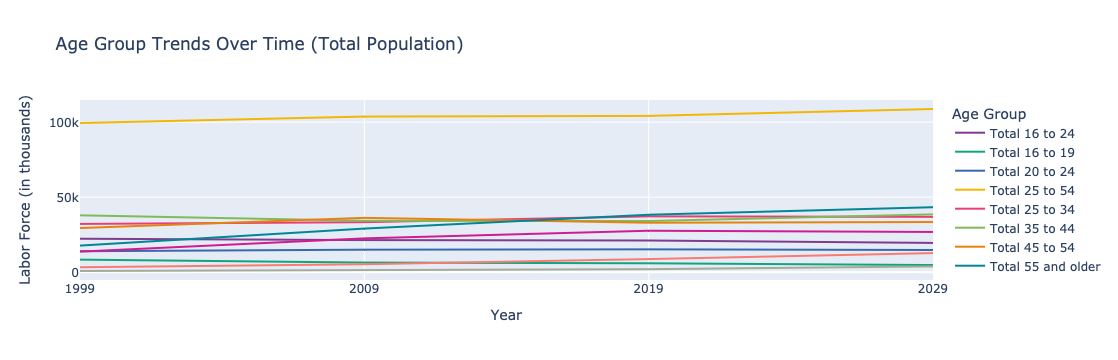

In [87]:
import plotly.express as px

# Filter data for groups with 'Total' prefix
age_groups = [
    'Total 16 to 24', 'Total 16 to 19', 'Total 20 to 24', 
    'Total 25 to 54', 'Total 25 to 34', 'Total 35 to 44', 
    'Total 45 to 54', 'Total 55 and older', 
    'Total 55 to 64', 'Total 65 to 74', 'Total 75 and older'
]

df_total = df1[df1['group'].isin(age_groups)]

# Reshape the data for visualization
df_total_melted = df_total.melt(
    id_vars='group', 
    value_vars=['1999', '2009', '2019', '2029'], 
    var_name='Year', 
    value_name='Labor Force'
)

# Plot the trends for "Total" groups
fig = px.line(
    df_total_melted, 
    x='Year', 
    y='Labor Force', 
    color='group', 
    title='Age Group Trends Over Time (Total Population)',
    labels={'Labor Force': 'Labor Force (in thousands)', 'Year': 'Year', 'group': 'Age Group'},
    color_discrete_sequence=px.colors.qualitative.Bold  

)

# Show the figure
fig.show()


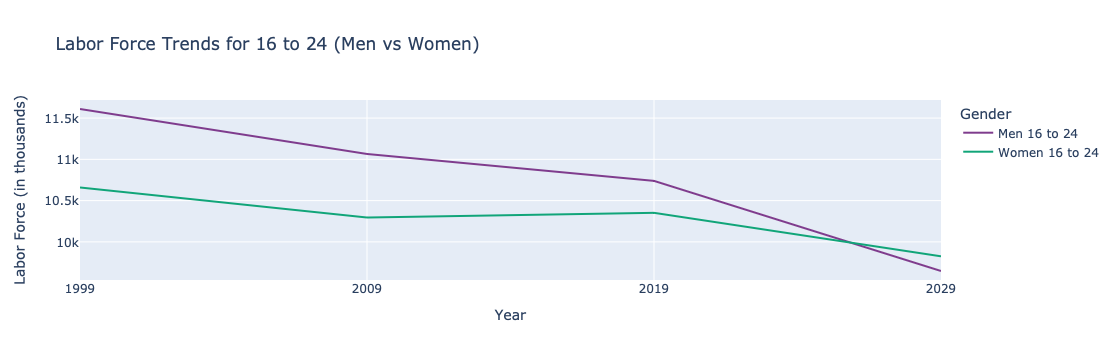

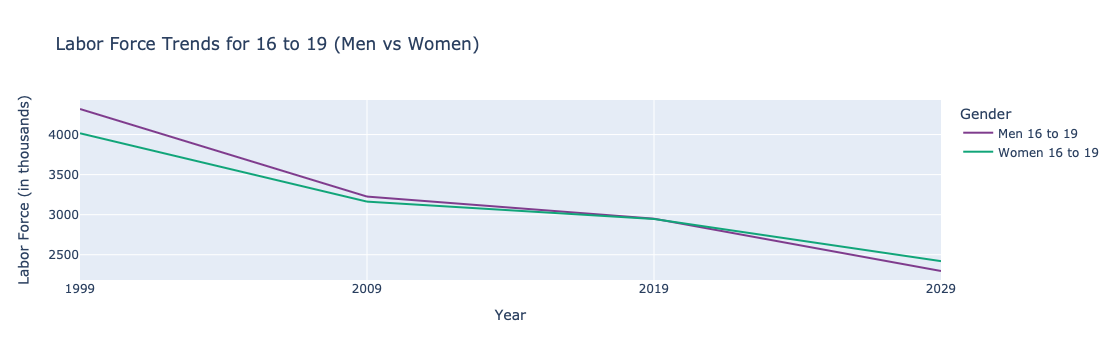

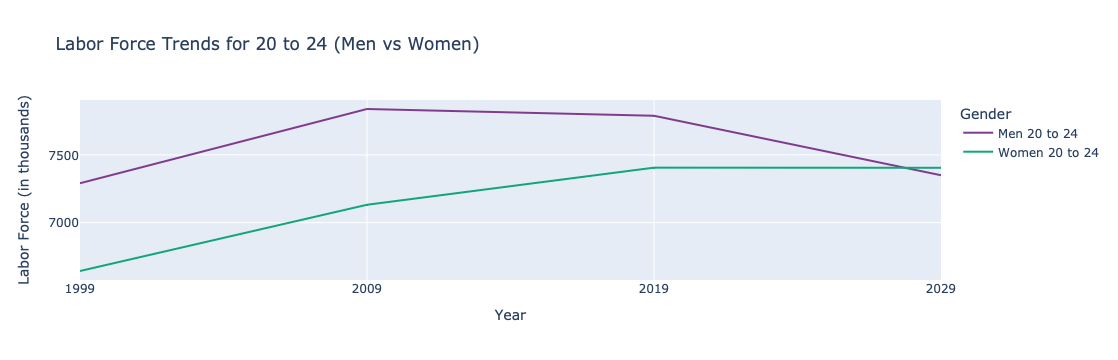

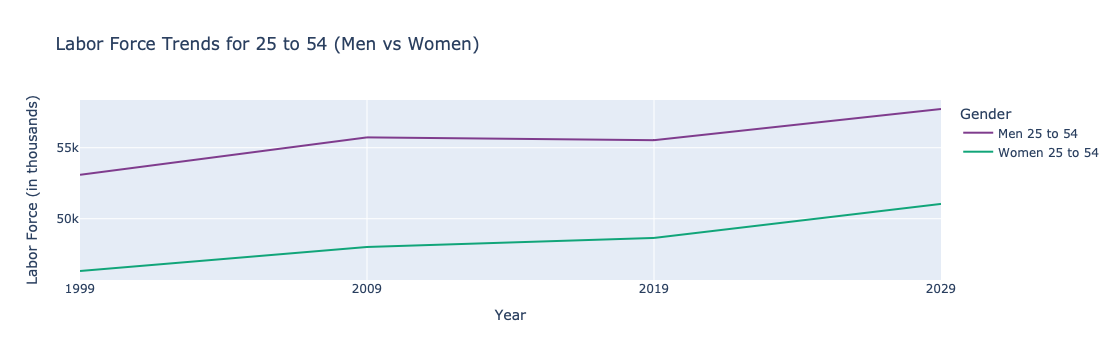

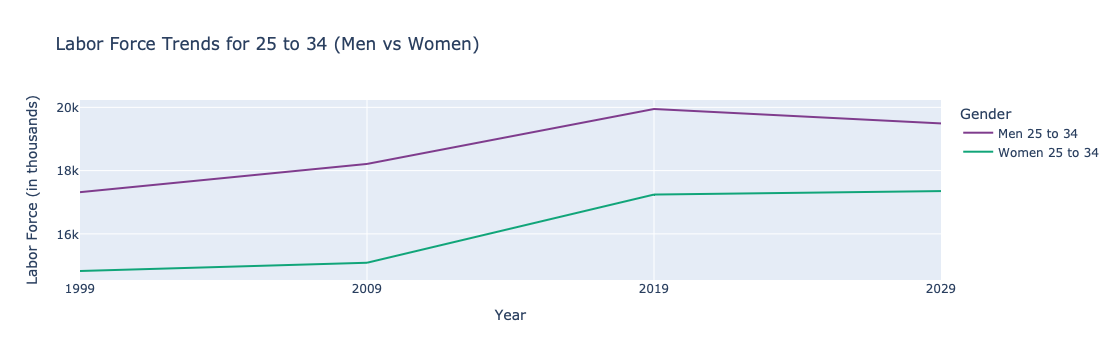

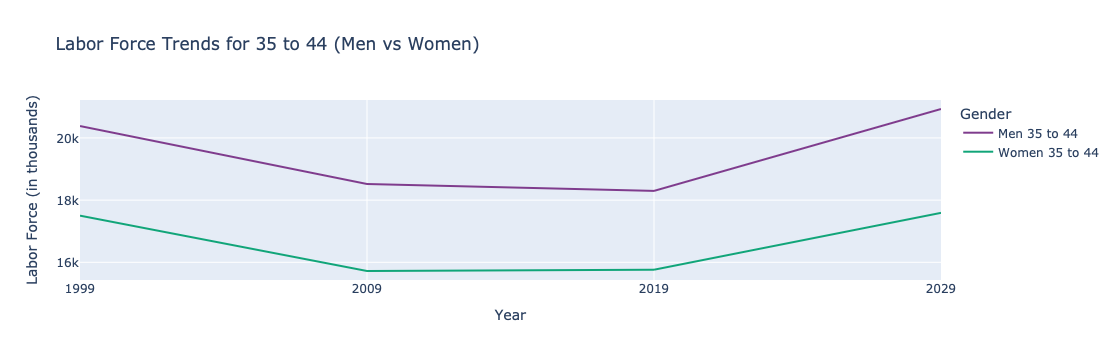

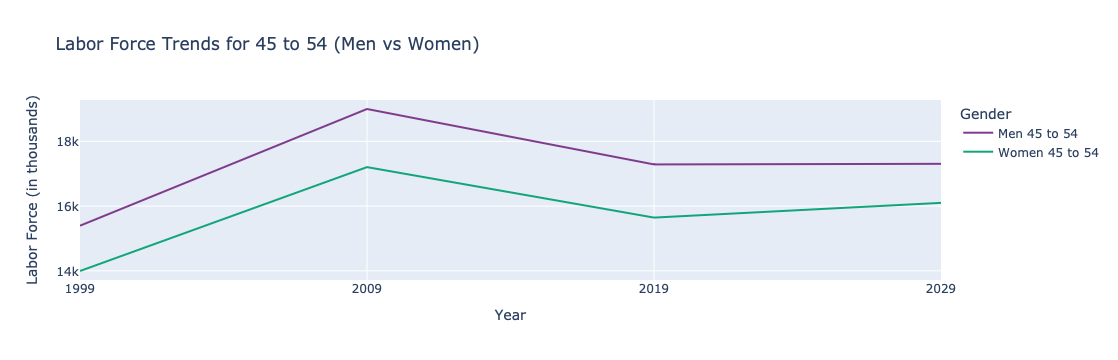

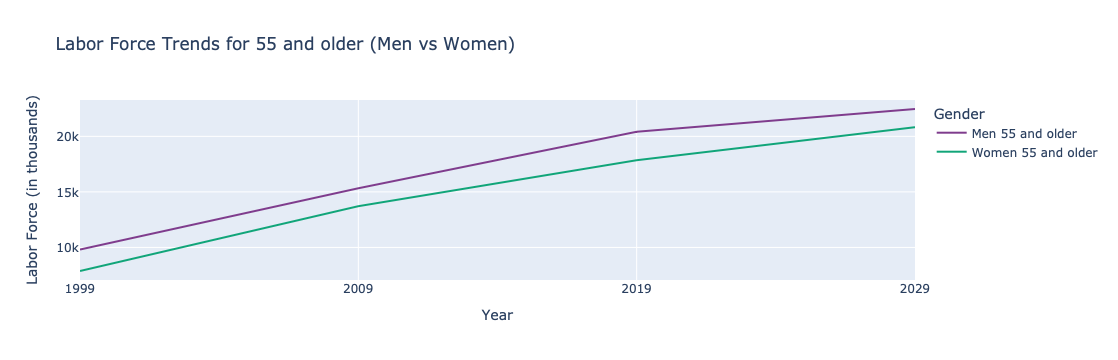

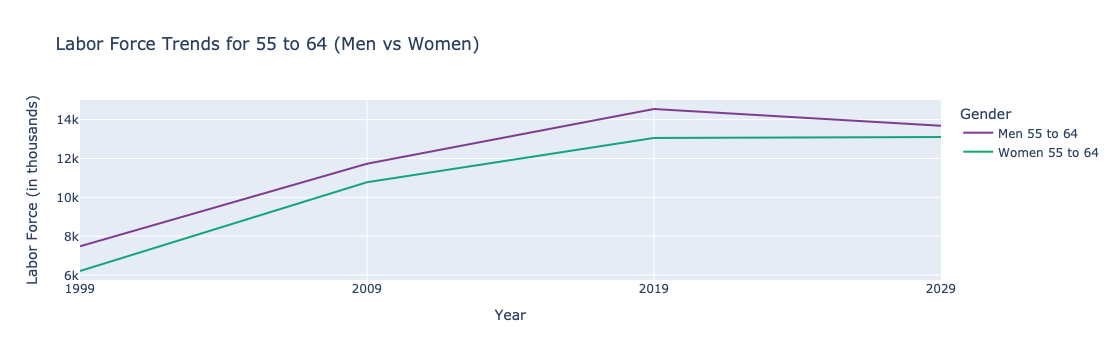

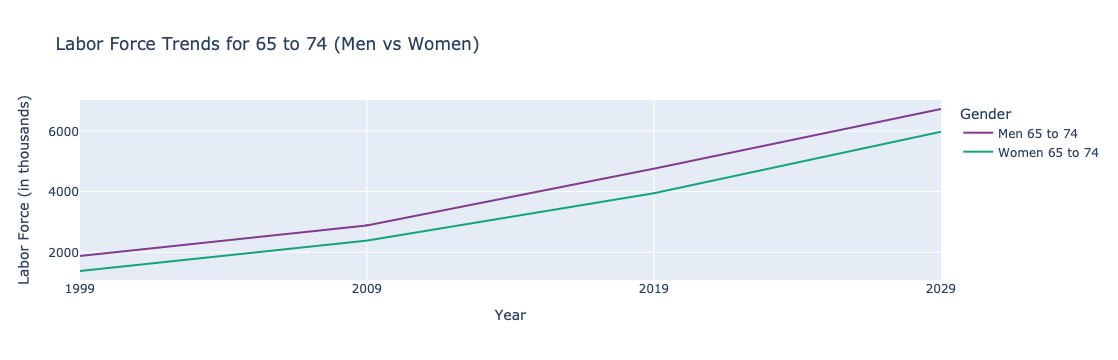

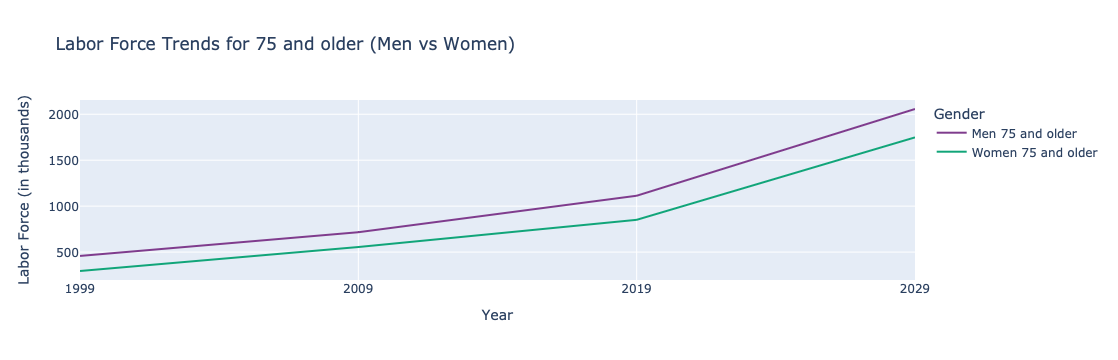

In [88]:

age_groups = [
    '16 to 24', '16 to 19', '20 to 24', 
    '25 to 54', '25 to 34', '35 to 44', 
    '45 to 54', '55 and older', 
    '55 to 64', '65 to 74', '75 and older'
]

# Loop through each age group and create a plot comparing men and women
for age_group in age_groups:
    # Filter data for men and women of the current age group
    men_group = f"Men {age_group}"
    women_group = f"Women {age_group}"
    df_age = df1[df1['group'].isin([men_group, women_group])]

    # Reshape the data for visualization
    df_age_melted = df_age.melt(
        id_vars='group', 
        value_vars=['1999', '2009', '2019', '2029'], 
        var_name='Year', 
        value_name='Labor Force'
    )

    # Plot the trends for the current age group
    fig = px.line(
        df_age_melted, 
        x='Year', 
        y='Labor Force', 
        color='group', 
        title=f'Labor Force Trends for {age_group} (Men vs Women)',
        labels={'Labor Force': 'Labor Force (in thousands)', 'Year': 'Year', 'group': 'Gender'},
        color_discrete_sequence=px.colors.qualitative.Bold  
    )

    # Show the figure
    fig.show()


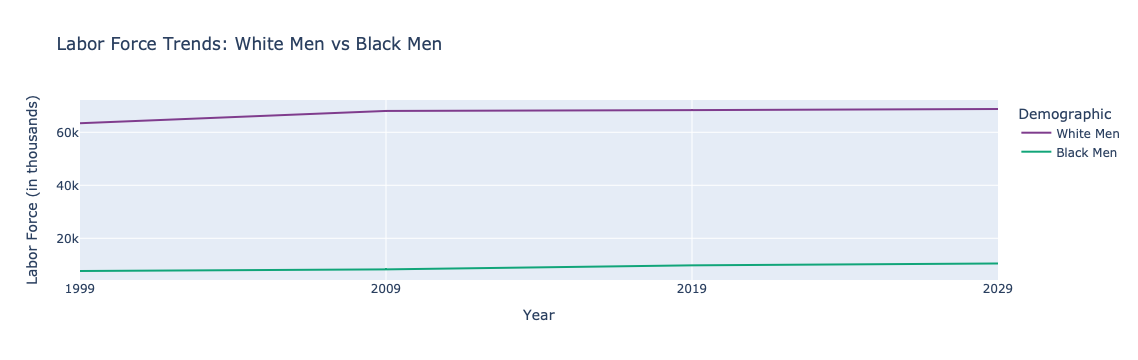

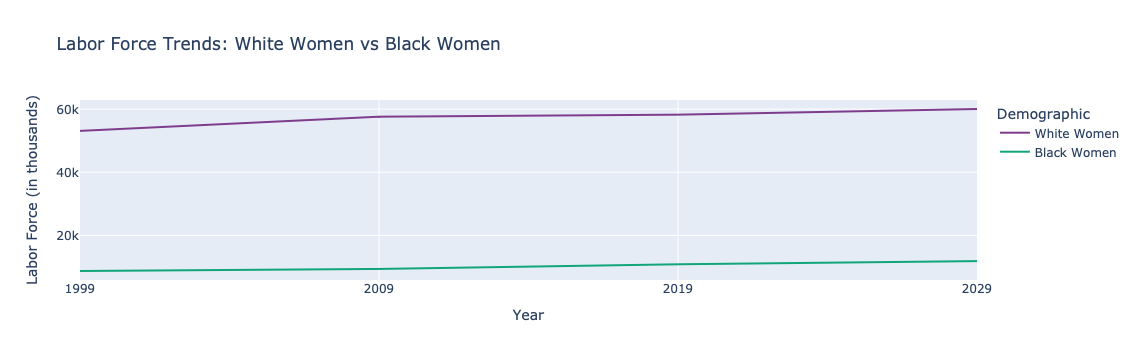

In [89]:
demographics = [
    {'group1': 'White Men', 'group2': 'Black Men', 'title': 'Labor Force Trends: White Men vs Black Men'},
    {'group1': 'White Women', 'group2': 'Black Women', 'title': 'Labor Force Trends: White Women vs Black Women'}
]

# Loop through each demographic pair and create a plot
for demographic in demographics:
    group1 = demographic['group1']
    group2 = demographic['group2']
    title = demographic['title']

    # Filter data for the selected groups
    df_demographics = df1[df1['group'].isin([group1, group2])]

    # Reshape the data for visualization
    df_demographics_melted = df_demographics.melt(
        id_vars='group', 
        value_vars=['1999', '2009', '2019', '2029'], 
        var_name='Year', 
        value_name='Labor Force'
    )

    # Plot the trends for the selected groups
    fig = px.line(
        df_demographics_melted, 
        x='Year', 
        y='Labor Force', 
        color='group', 
        title=title,
        labels={'Labor Force': 'Labor Force (in thousands)', 'Year': 'Year', 'group': 'Demographic'},
        color_discrete_sequence=px.colors.qualitative.Bold  
    )

    # Show the figure
    fig.show()
